In [477]:
import pandas as pd


In [478]:
df = pd.read_csv('usedCars1.csv')

In [479]:
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


In [480]:
df.isnull().sum()

Id                     0
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

missing value treatment

In [481]:
# 1. "FuelType"
# Fill missing FuelType with mode (most common value)
df["FuelType"].fillna(df["FuelType"].mode()[0], inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9672\1400252021.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FuelType"].fillna(df["FuelType"].mode()[0], inplace=True)


In [482]:
# 2. "TransmissionType"
df["TransmissionType"] = df.groupby("Model")["TransmissionType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "M"))
df['TransmissionType'].value_counts()
# Define the transmission mapping
transmission_mapping = {
    'Manual': 'M',
    'MANUAL': 'M',
    'manual': 'M',
    'M': 'M',
    'Automatic': 'A',
    'AUOTMATIC': 'A',
    'AUTOMATIC': 'A',
    'A': 'A',
    'Cvt': 'C'  # Treat 'Cvt' as 'C'

}

# Apply the mapping
df['TransmissionType'] = df['TransmissionType'].replace(transmission_mapping)

df['TransmissionType'].unique()


array(['M', 'A', 'C'], dtype=object)

Since "TransmissionType" is crucial in your dataset, the best approach depends on your data structure. Here’s the most reliable method to ensure accuracy:

✅ 1. Fill Based on Car Model (Best for Accuracy)
Since transmission type is often specific to a model, use this approach:

🔹 Why? This ensures missing values are replaced by the most common transmission type specific to the car model, reducing errors.

✅ 2. Aplly mapping after the missing value treatment which is batter because i plan onehot encoding for categorical columns

In [ ]:
# 3. "CngKit"
# Fill missing "CngKit" values with the most common value in the dataset
df["CngKit"].fillna(df["CngKit"].mode()[0], inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_9672\2983053411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CngKit"].fillna(df["CngKit"].mode()[0], inplace=True)


Remove the string values from "Price" and "Owner" column

In [484]:
df['Price'] = (df['Price']
               .astype(str)
               .str.replace(',', '', regex=False)
               .str.replace(' Lakhs', '', regex=False)
               .str.strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Extract numeric part from 'Owner' and convert to integer
df['Owner'] = df['Owner'].str.extract('(\d+)').astype(float).astype('int64')

# Remove White space from the "BodyType" Column
df["BodyStyle"] = df["BodyStyle"].str.strip()


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ACER\AppData\Local\Temp\ipykernel_9672\3076156551.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['Owner'] = df['Owner'].str.extract('(\d+)').astype(float).astype('int64')


In [485]:
df.isnull().sum()

Id                  0
Company             0
Model               0
Variant             0
FuelType            0
Colour              0
Kilometer           0
BodyStyle           0
TransmissionType    0
ManufactureDate     0
ModelYear           0
CngKit              0
Price               0
Owner               0
DealerState         0
DealerName          0
City                0
Warranty            0
QualityScore        0
dtype: int64

In [486]:
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,M,2018-02-01,2018,Company Fitted,5.75,1,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,M,2021-03-01,2021,Company Fitted,4.35,1,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,M,2015-03-01,2015,Company Fitted,4.70,1,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,M,2020-08-01,2020,Company Fitted,9.90,1,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,M,2010-11-01,2010,Company Fitted,2.70,2,Karnataka,Zippy Automart,Bangalore,0,7.5


feature Engineering

In [487]:
# Convert 'ManufactureDate' to datetime format
df['ManufactureDate'] = pd.to_datetime(df['ManufactureDate'], errors='coerce')

# Extract the year from 'ManufactureDate' and calculate car age, then convert to int64
df['CarAge'] = (2025 - df['ManufactureDate'].dt.year).astype('int64')

# Display the first few rows
print(df[['ManufactureDate', 'CarAge']].head())

  ManufactureDate  CarAge
0      2018-02-01       7
1      2021-03-01       4
2      2015-03-01      10
3      2020-08-01       5
4      2010-11-01      15


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                1064 non-null   int64         
 1   Company           1064 non-null   object        
 2   Model             1064 non-null   object        
 3   Variant           1064 non-null   object        
 4   FuelType          1064 non-null   object        
 5   Colour            1064 non-null   object        
 6   Kilometer         1064 non-null   int64         
 7   BodyStyle         1064 non-null   object        
 8   TransmissionType  1064 non-null   object        
 9   ManufactureDate   1064 non-null   datetime64[ns]
 10  ModelYear         1064 non-null   int64         
 11  CngKit            1064 non-null   object        
 12  Price             1064 non-null   float64       
 13  Owner             1064 non-null   int64         
 14  DealerState       1064 n

In [489]:
df.describe(include='all')

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore,CarAge
count,1064.000000,1064,1064,1064,1064,1064,1064.000000,1064,1064,1064,1064.000000,1064,1064.000000,1064.000000,1064,1064,1064,1064.000000,1064.000000,1064.000000
unique,NaN,23,218,575,5,76,NaN,8,3,NaN,NaN,2,NaN,NaN,10,57,11,NaN,NaN,NaN
top,NaN,MARUTI SUZUKI,CITY,VXI,PETROL,White,NaN,HATCHBACK,M,NaN,NaN,Company Fitted,NaN,NaN,Delhi,Car Choice Exclusif,Delhi,NaN,NaN,NaN
freq,NaN,252,38,37,671,289,NaN,425,957,NaN,NaN,1056,NaN,NaN,196,67,196,NaN,NaN,NaN
mean,568156.542293,NaN,NaN,NaN,NaN,NaN,52807.187970,NaN,NaN,2017-04-11 14:09:55.488721920,2016.864662,NaN,97.635357,1.167293,NaN,NaN,NaN,0.738722,7.770207,8.135338
min,525978.000000,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,2003-11-01 00:00:00,2003.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,2.000000
25%,555321.500000,NaN,NaN,NaN,NaN,NaN,32113.500000,NaN,NaN,2015-08-01 00:00:00,2015.000000,NaN,4.850000,1.000000,NaN,NaN,NaN,0.000000,7.500000,6.000000
50%,572753.000000,NaN,NaN,NaN,NaN,NaN,49432.000000,NaN,NaN,2017-07-01 00:00:00,2017.000000,NaN,6.750000,1.000000,NaN,NaN,NaN,1.000000,7.800000,8.000000
75%,583072.750000,NaN,NaN,NaN,NaN,NaN,68828.500000,NaN,NaN,2019-04-01 00:00:00,2019.000000,NaN,9.862500,1.000000,NaN,NaN,NaN,1.000000,8.100000,10.000000
max,589122.000000,NaN,NaN,NaN,NaN,NaN,640000.000000,NaN,NaN,2023-07-01 00:00:00,2023.000000,NaN,95000.000000,4.000000,NaN,NaN,NaN,1.000000,9.400000,22.000000


Plot visualization for Numeric &  Categorical features

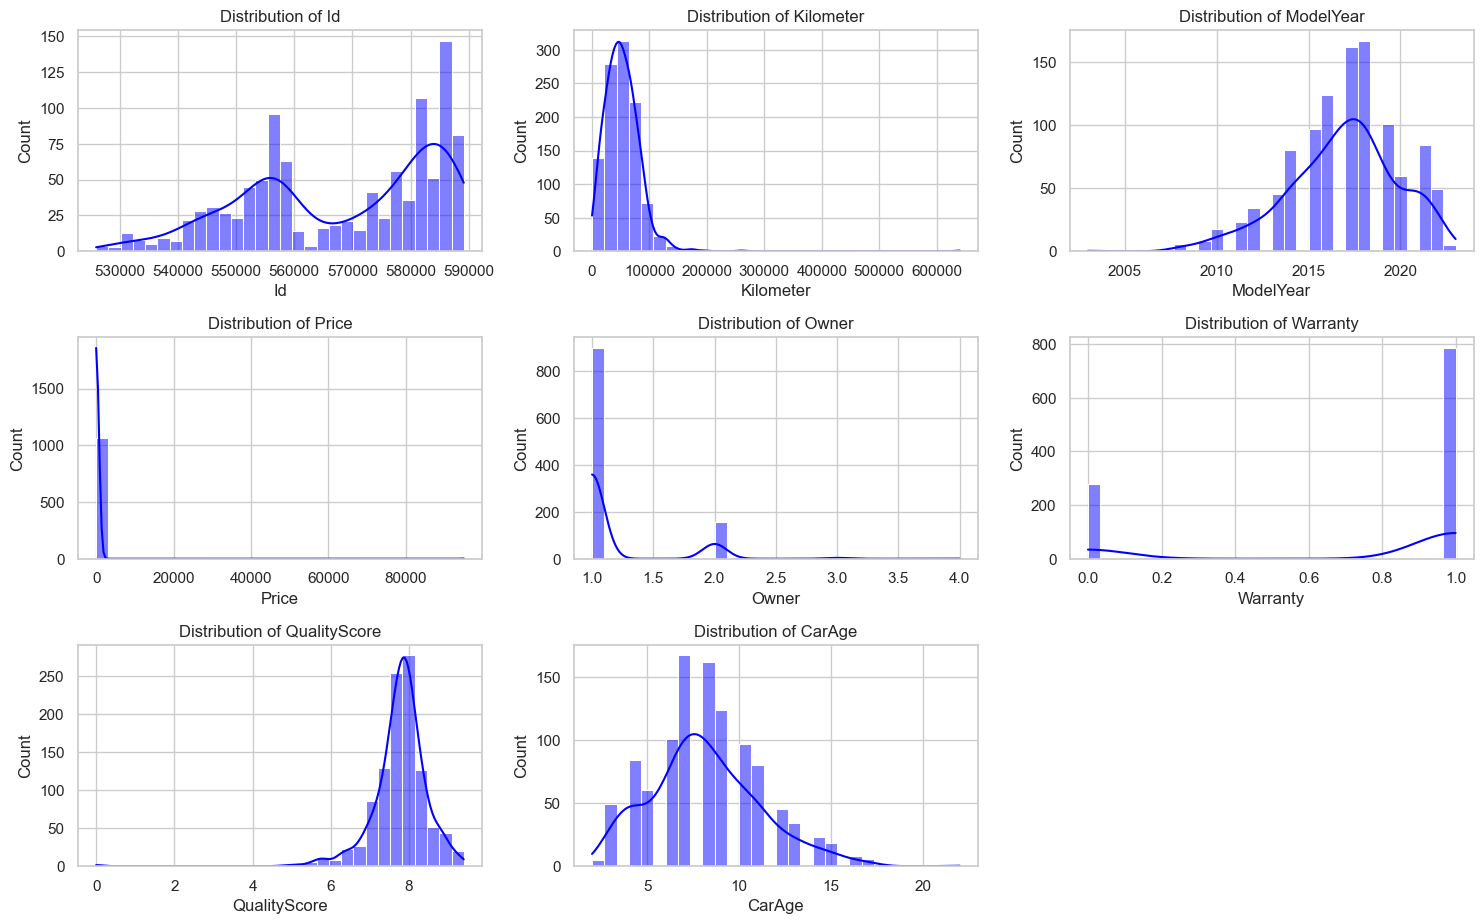

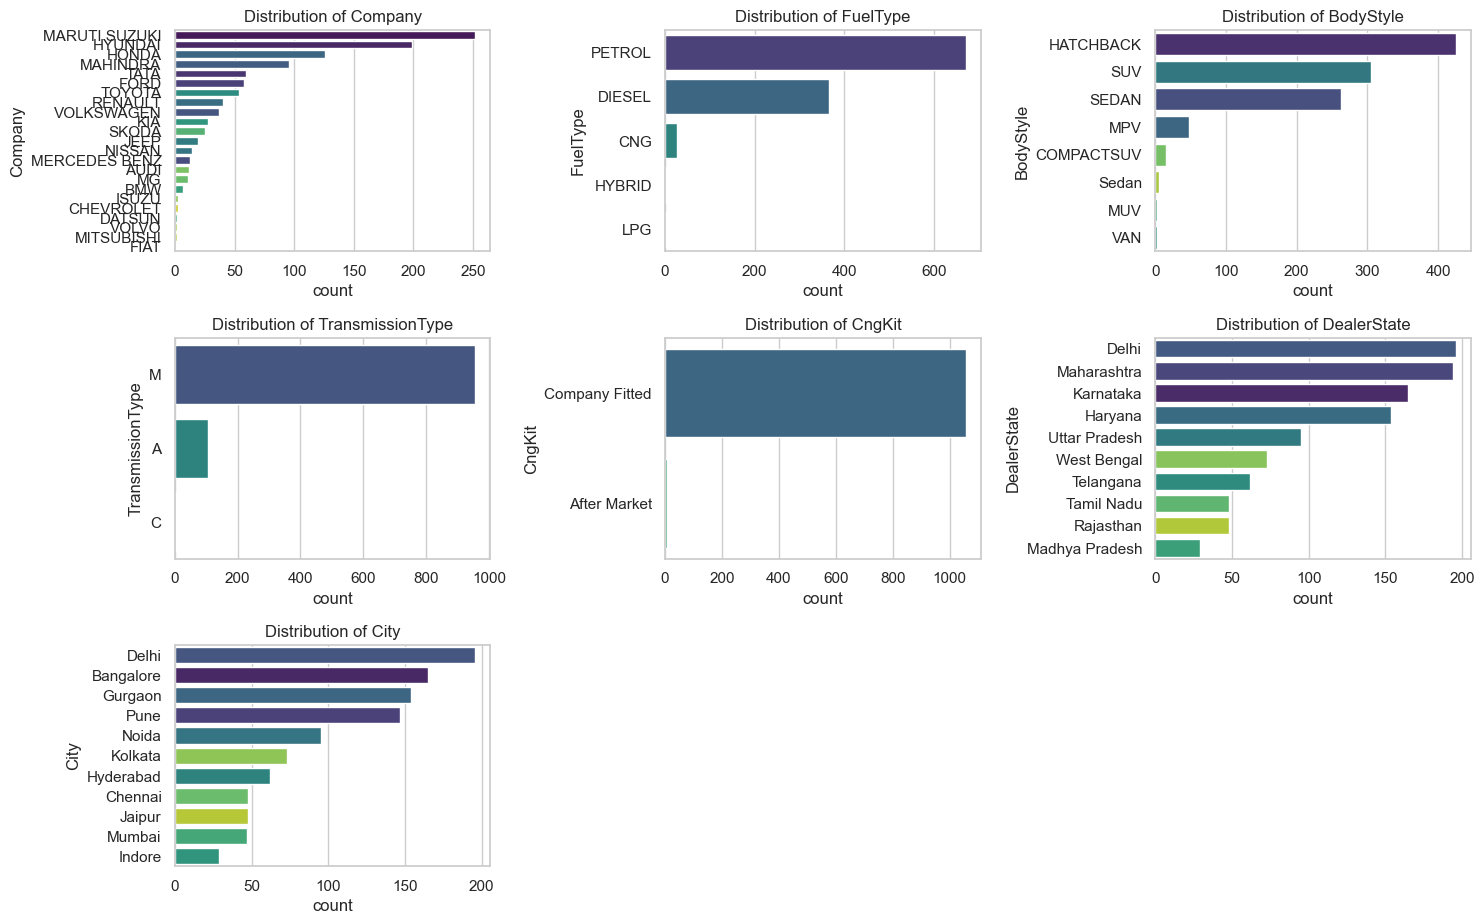

In [490]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude unwanted categorical columns
excluded_categorical_cols = ['ManufactureDate', 'Model', 'Variant', 'Colour', 'DealerName']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col not in excluded_categorical_cols]

# Plot distributions for numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)  # Adjust rows and columns based on data size
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Plot count distributions for categorical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)  # Adjust rows and columns based on data size
    sns.countplot(y=df[col], hue=df[col], palette="viridis", order=df[col].value_counts().index, legend=False)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


Removing Outliers from important columns

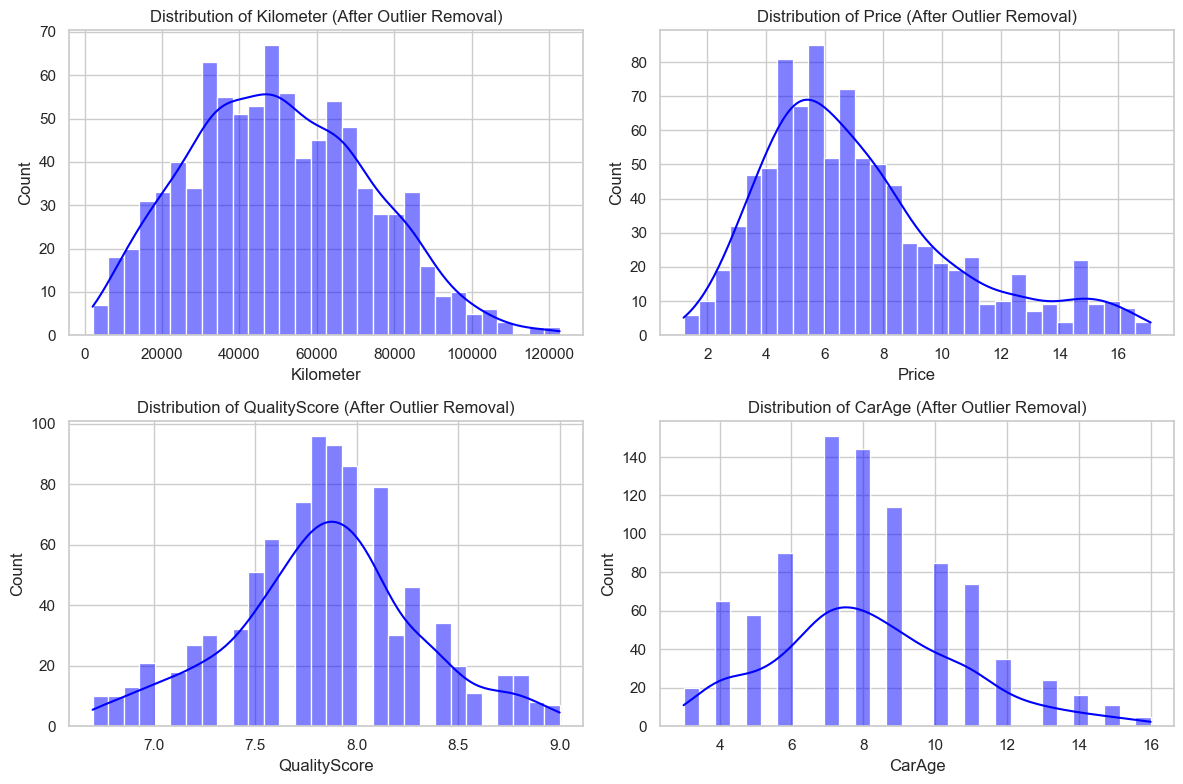

In [491]:
numeric_features_for_outliers = ['Kilometer','Price', 'QualityScore', 'CarAge']

def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outliers(df, numeric_features_for_outliers)


# Plot distribution plots after outlier removal
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_features_for_outliers):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col} (After Outlier Removal)")

plt.tight_layout()
plt.show()

In [492]:
df.shape

(892, 20)

In [495]:
print(numerical_cols)

Index(['Id', 'Kilometer', 'ModelYear', 'Price', 'Owner', 'Warranty',
       'QualityScore', 'CarAge'],
      dtype='object')


In [496]:
print(categorical_cols)

['Company', 'FuelType', 'BodyStyle', 'TransmissionType', 'CngKit', 'DealerState', 'City']


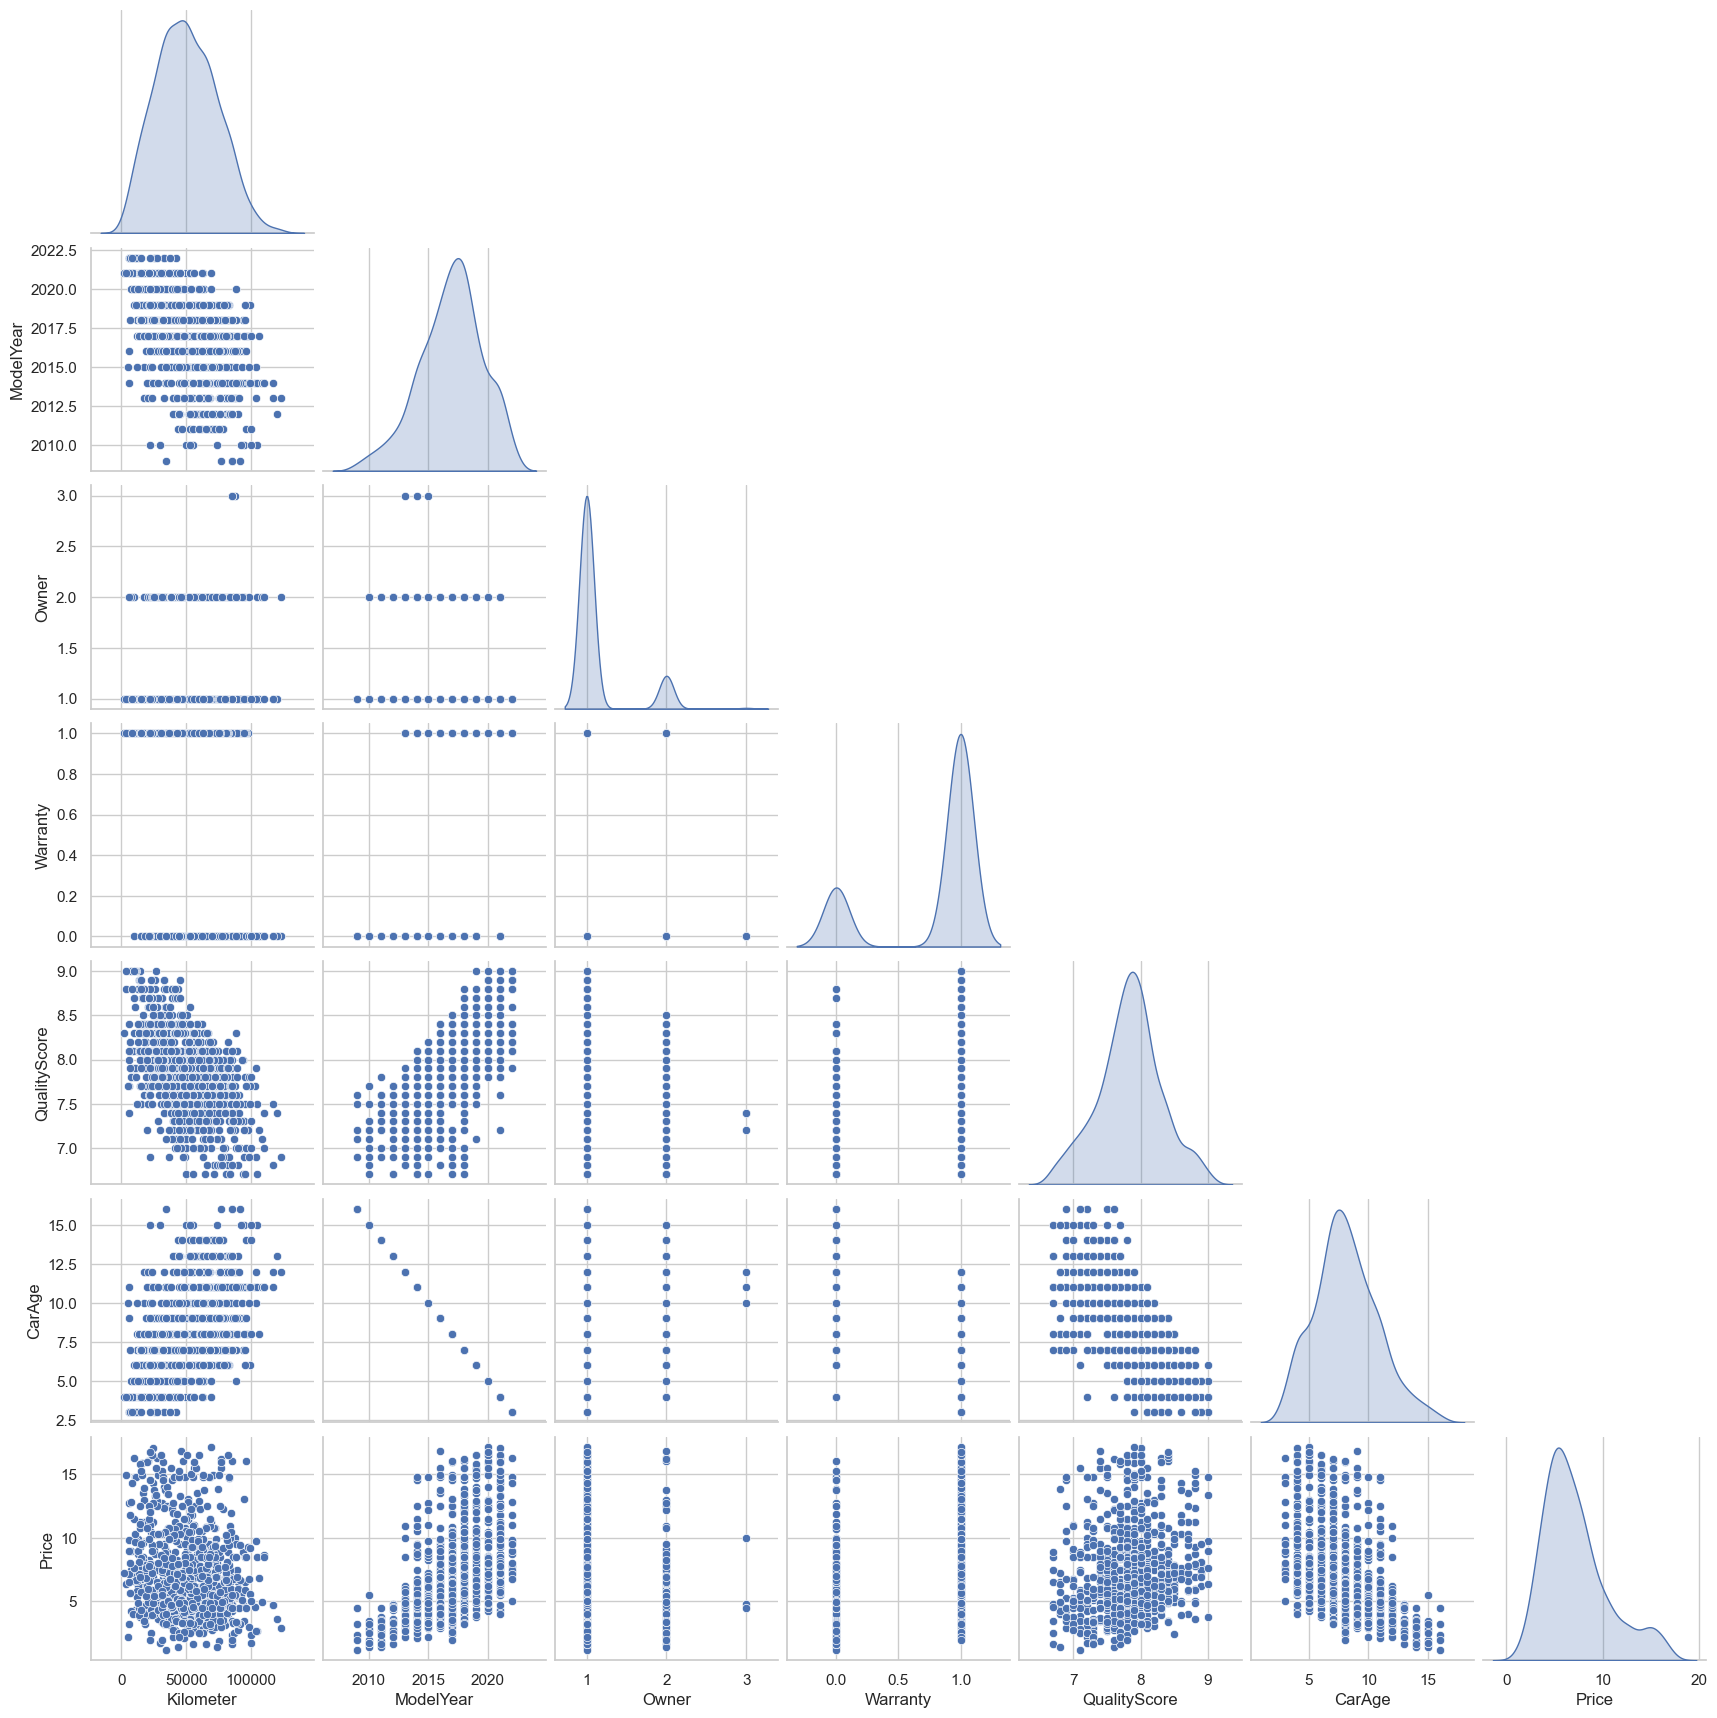

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Kilometer', 'ModelYear', 'Owner', 'Warranty', 'QualityScore', 'CarAge', 'Price']

# Creating the pair plot with "Price" as the main focus
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)

# Show plot
plt.show()


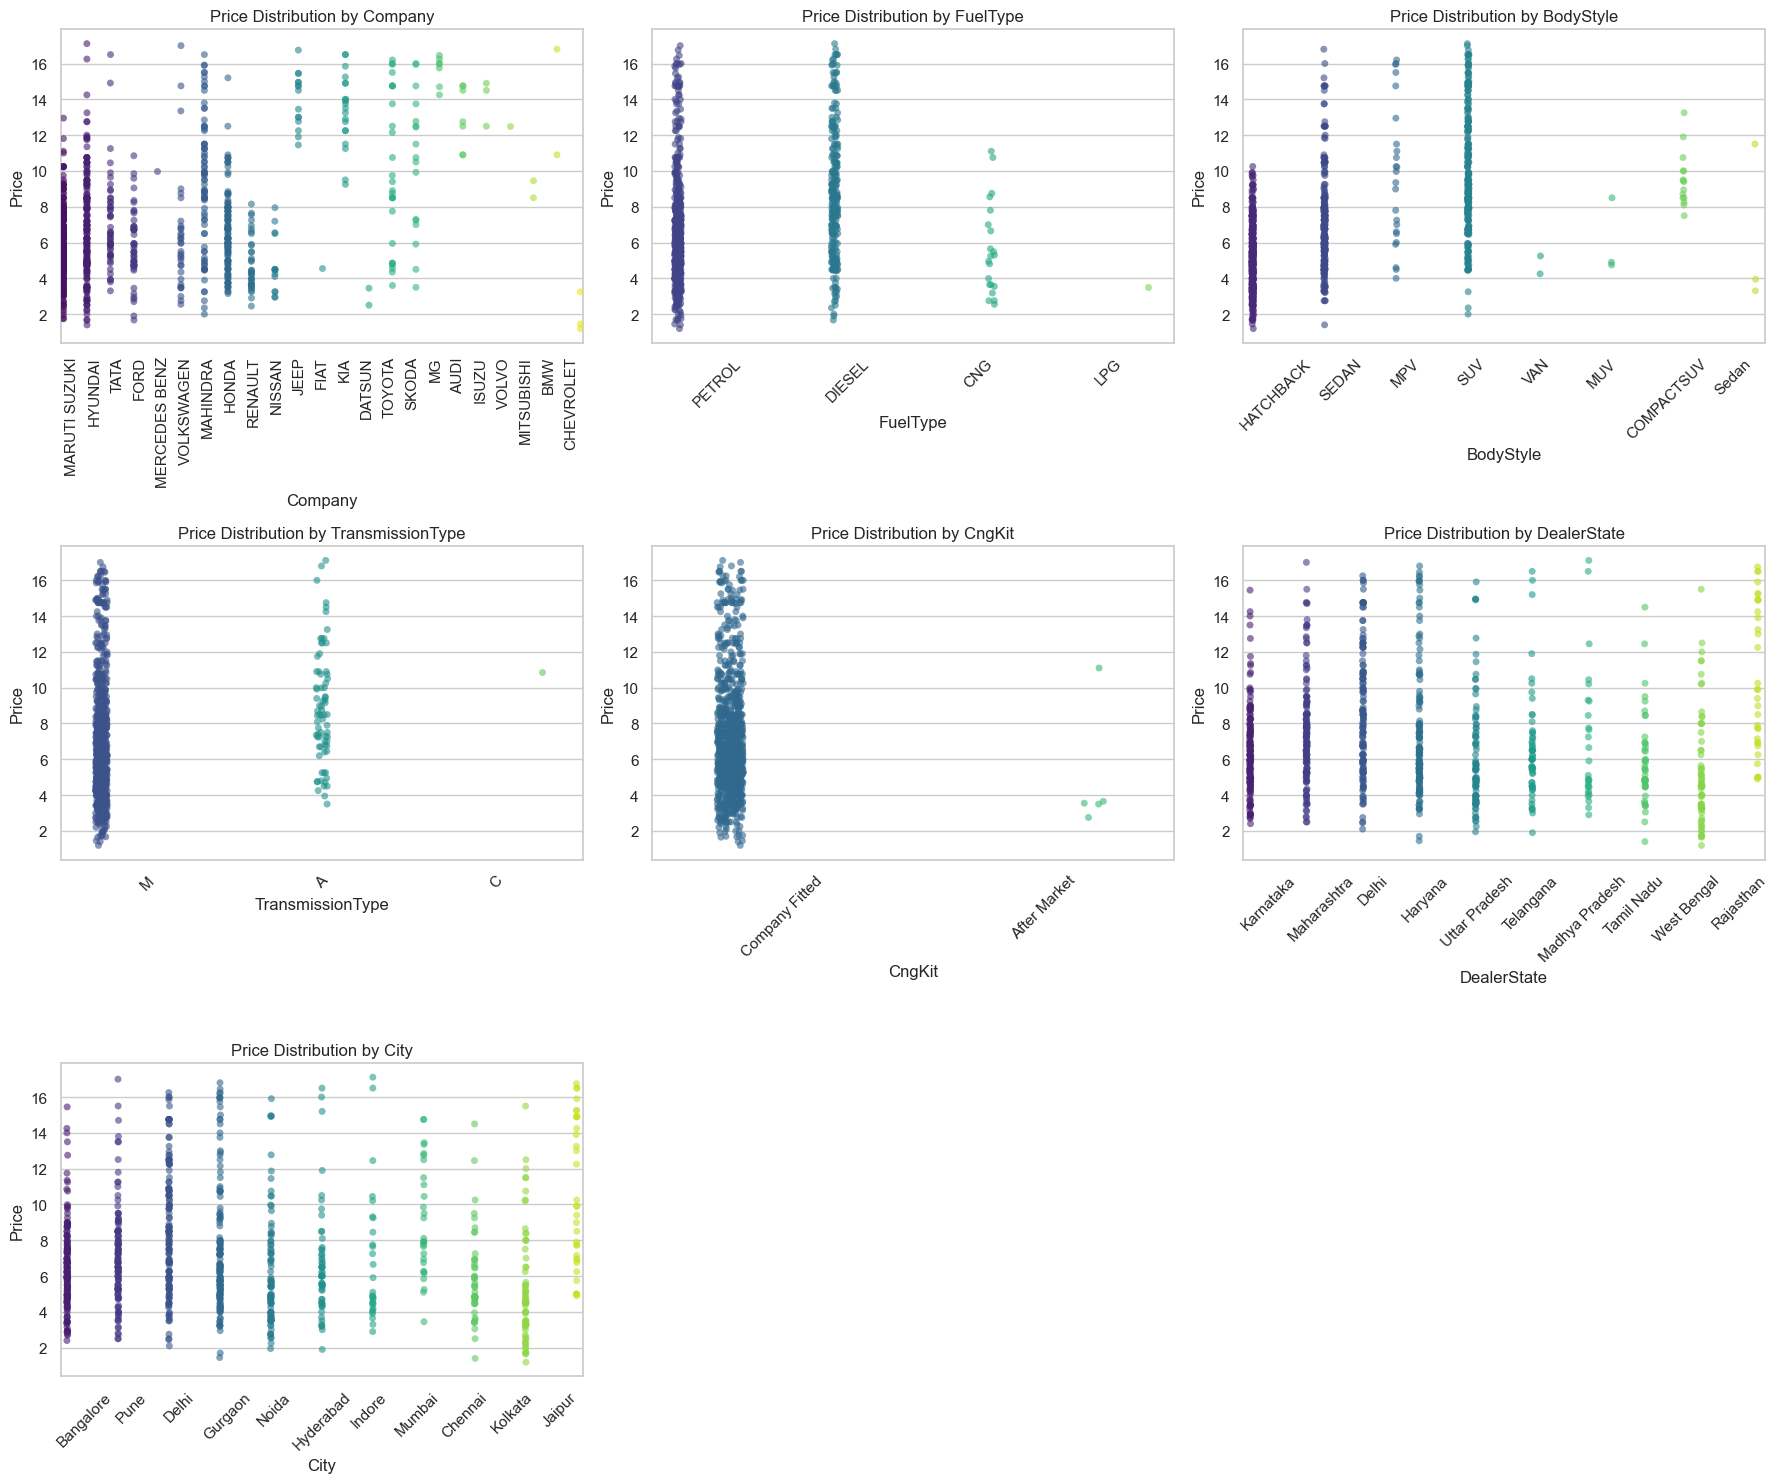

In [504]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Company', 'FuelType', 'BodyStyle', 'TransmissionType', 'CngKit', 'DealerState', 'City']

plt.figure(figsize=(18, 15))  # Increased figure size for better readability

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.stripplot(x=df[col], y=df["Price"], jitter=True, alpha=0.6, hue=df[col], legend=False, dodge=True, palette="viridis")
    
    plt.xticks(rotation=90 if col == "Company" else 45)  # Rotate for readability
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"Price Distribution by {col}")

plt.tight_layout()
plt.show()


Selected & important features

In [505]:
features = ['Company', 'FuelType', 'Kilometer', 'BodyStyle', 'Colour','CngKit', 'DealerName', 'City', 'DealerState',
            'TransmissionType', 'Owner', 'Warranty', 'QualityScore', 'CarAge']
target = 'Price'
df = df[features + [target]]

devide the dataset into trainning set  & testing set

In [506]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing for numeric & categorical feature 

In [509]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_features = ['Company', 'FuelType', 'BodyStyle', 'TransmissionType', 'Colour', 'Owner','CngKit', 'DealerName', 'City', 'DealerState']
numeric_features = ['Kilometer', 'Warranty', 'QualityScore', 'CarAge']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

DecisionTree Regression Metrics:
MSE: 4.3322
MAE: 1.5169
R2 Score: 0.5979


DecisionTree Accuracy (R2 Score): 0.5979



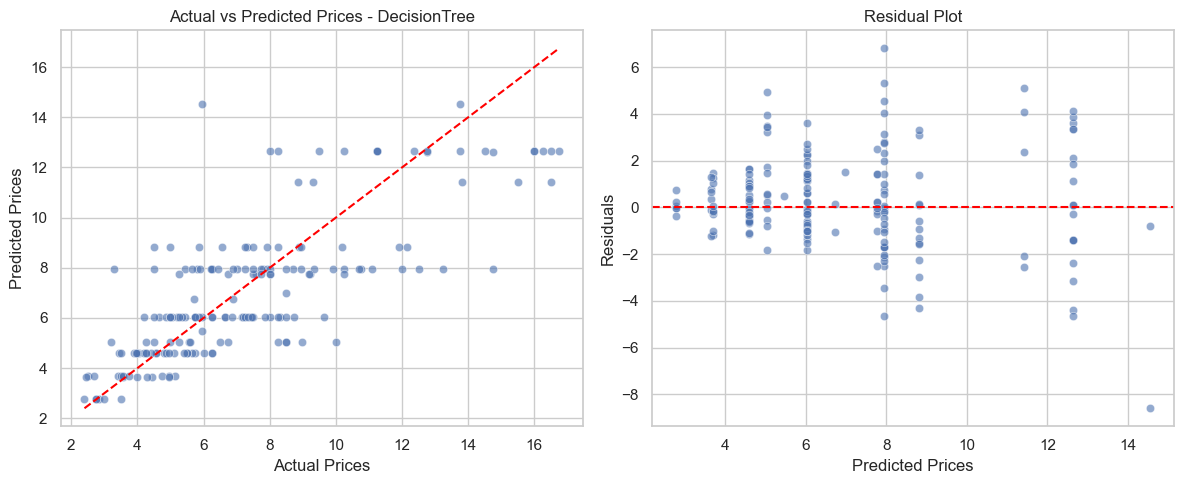

Price Categories Distribution:
Low       60
Medium    80
High      39
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

name = 'DecisionTree'

# Define the DecisionTreeRegressor and its hyperparameter grid
model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'model__max_depth': [5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Set up GridSearchCV for hyperparameter tuning using R2 as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using performance metrics
reg_metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Print performance metrics in the requested format
print(f"{name} Regression Metrics:")
for metric, value in reg_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\n")
print(f"{name} Accuracy (R2 Score): {reg_metrics['R2 Score']:.4f}\n")

residuals = y_test - y_pred

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Actual vs. Predicted Prices
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title(f"Actual vs Predicted Prices - {name}")

# Plot 2: Residual Plot (Error Plot)
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
axes[1].set_xlabel("Predicted Prices")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


# Optional: Create price categories ("Low", "Medium", "High") based on quantiles of predicted prices
labels = ['Low', 'Medium', 'High']
price_categories = pd.qcut(y_pred, q=3, labels=labels)
print("Price Categories Distribution:")
print(price_categories.value_counts())


RandomForest Regression Metrics:
MSE: 2.8479
MAE: 1.2090
R2 Score: 0.7356


RandomForest Accuracy (R2 Score): 0.7356



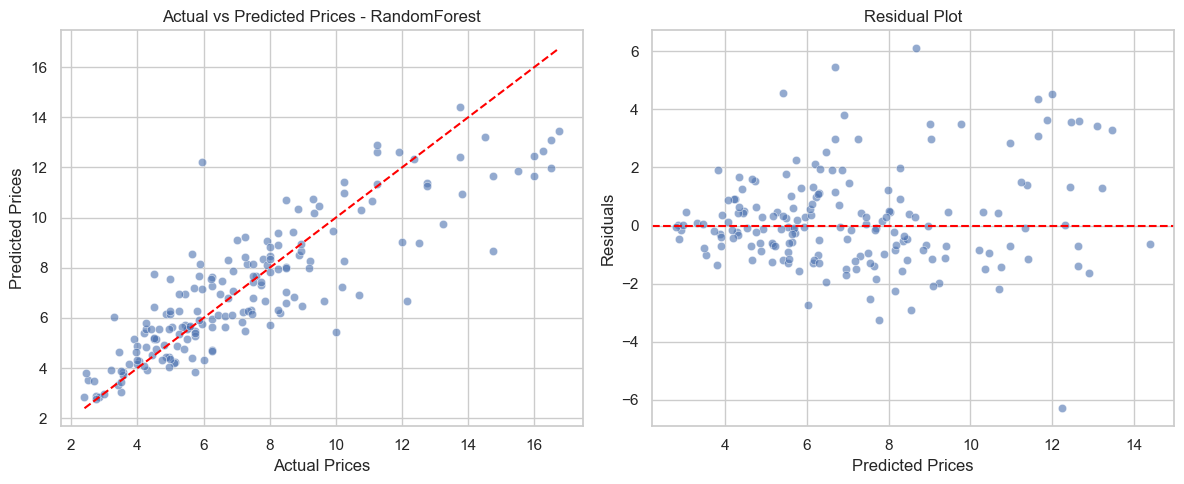

In [520]:
from sklearn.ensemble import RandomForestRegressor
name = 'RandomForest'

# Define the RandomForestRegressor and its hyperparameter grid
model = RandomForestRegressor(random_state=42)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],       # None means no maximum depth
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Set up GridSearchCV for hyperparameter tuning using R2 as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using performance metrics
reg_metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Print performance metrics in the requested format
print(f"{name} Regression Metrics:")
for metric, value in reg_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\n")
print(f"{name} Accuracy (R2 Score): {reg_metrics['R2 Score']:.4f}\n")

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Actual vs. Predicted Prices
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title(f"Actual vs Predicted Prices - {name}")

# Plot 2: Residual Plot (Error Plot)
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
axes[1].set_xlabel("Predicted Prices")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()

GradientBoosting Regression Metrics:
MSE: 2.5236
MAE: 1.1134
R2 Score: 0.7657


GradientBoosting Accuracy (R2 Score): 0.7657



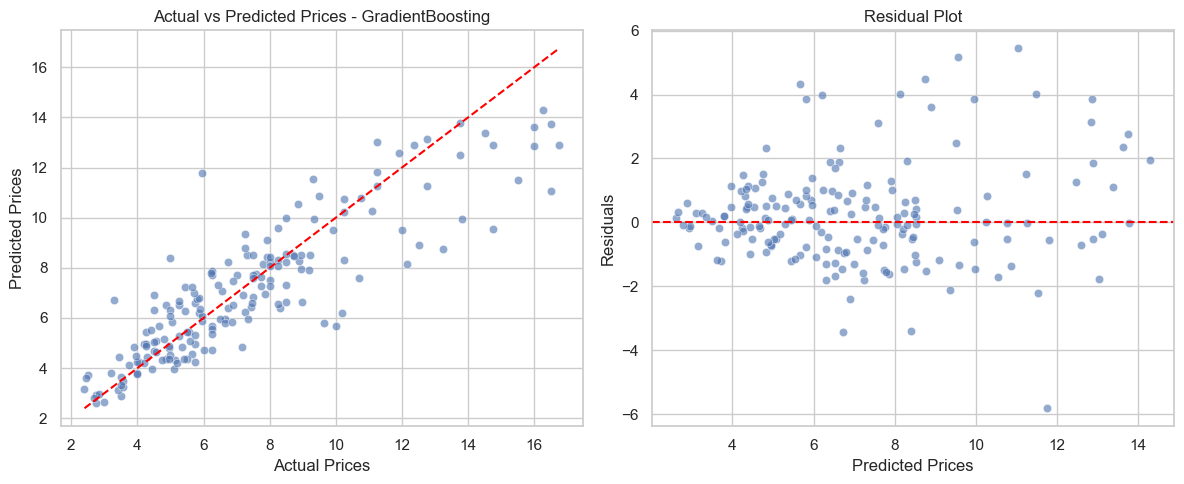

In [521]:
from sklearn.ensemble import GradientBoostingRegressor

name = 'GradientBoosting'

# Define the GradientBoostingRegressor and its hyperparameter grid
model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Set up GridSearchCV for hyperparameter tuning using R2 as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using performance metrics
reg_metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Print performance metrics in the requested format
print(f"{name} Regression Metrics:")
for metric, value in reg_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\n")
print(f"{name} Accuracy (R2 Score): {reg_metrics['R2 Score']:.4f}\n")

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Actual vs. Predicted Prices
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title(f"Actual vs Predicted Prices - {name}")

# Plot 2: Residual Plot (Error Plot)
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
axes[1].set_xlabel("Predicted Prices")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


XGBoost Regression Metrics:
MSE: 2.4548
MAE: 1.1573
R2 Score: 0.7721


XGBoost Accuracy (R2 Score): 0.7721



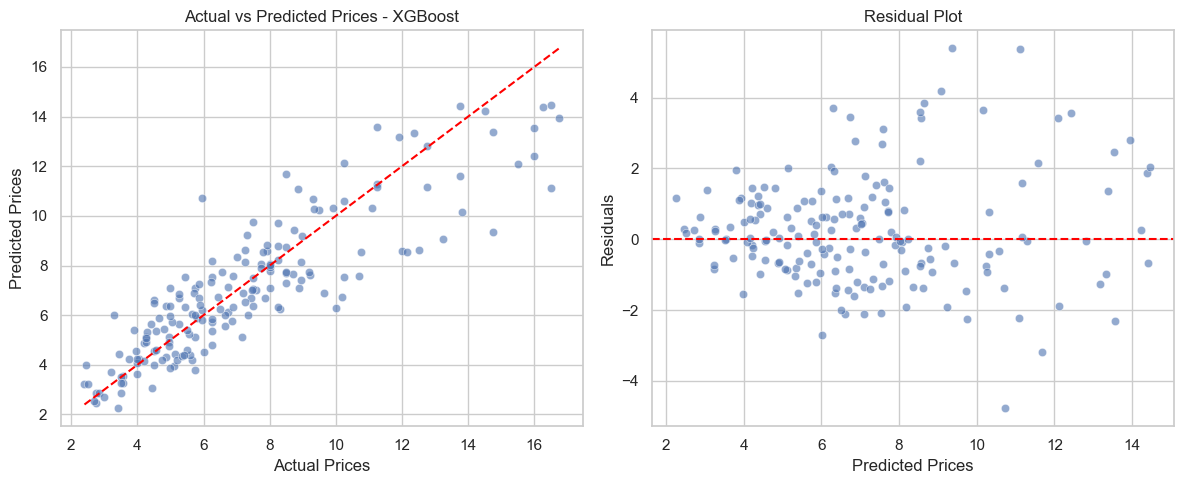

In [522]:
from xgboost import XGBRegressor


name = 'XGBoost'

# Define the XGBRegressor and its hyperparameter grid
model = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

# Create a pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # preprocessor must be defined elsewhere
    ('model', model)
])

# Set up GridSearchCV for hyperparameter tuning using R2 as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model using performance metrics
reg_metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2 Score": r2_score(y_test, y_pred)
}

# Print performance metrics in the requested format
print(f"{name} Regression Metrics:")
for metric, value in reg_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\n")
print(f"{name} Accuracy (R2 Score): {reg_metrics['R2 Score']:.4f}\n")

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Actual vs. Predicted Prices
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_xlabel("Actual Prices")
axes[0].set_ylabel("Predicted Prices")
axes[0].set_title(f"Actual vs Predicted Prices - {name}")

# Plot 2: Residual Plot (Error Plot)
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')  # Horizontal line at 0 for reference
axes[1].set_xlabel("Predicted Prices")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual Plot")

plt.tight_layout()
plt.show()


## Summery of the Model Accuracy

### Based on the reported metrics:

##### DecisionTree: R² = 0.5979
##### RandomForest: R² = 0.7356
##### GradientBoosting: R² = 0.7657
##### XGBoost: R² = 0.7721

The XGBoost model is considered the best because it has the highest R² Score (0.7721), which indicates it explains approximately 77.21% of the variance in the target variable (Price). Additionally, its Mean Squared Error (2.4548) is the lowest among the models, and its Mean Absolute Error (1.1573) is competitive. Higher R², combined with lower error metrics, suggests that XGBoost provides the most accurate predictions on your dataset.